In [1]:
from keras import Sequential
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense, Dropout
from keras.utils import np_utils, print_summary
from keras.models import load_model

Using TensorFlow backend.


In [2]:
def loadData():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    return (x_train, y_train), (x_test, y_test)

In [3]:
def showData(x, label):
    pixels = np.array(x, dtype='uint8')

    pixels = pixels.reshape((28, 28))

    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [6]:
(x_train, y_train), (x_test, y_test) = loadData()

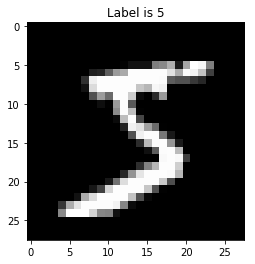

In [9]:
showData(x_train[0],5)

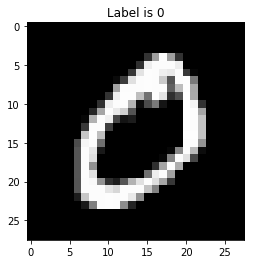

In [11]:
showData(x_train[1],0)

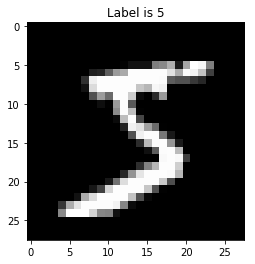

In [12]:
showData(x_train[0], y_train[0])

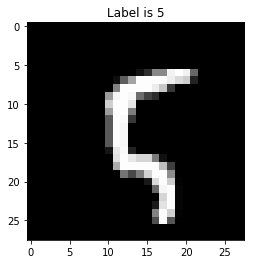

In [13]:
showData(x_train[100], y_train[100])

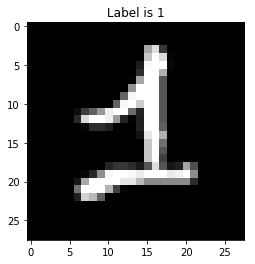

In [14]:
showData(x_train[24], y_train[24])

In [15]:
def preprocess_labels(y):
    labels = np_utils.to_categorical(y)
    return labels

In [16]:
 y_train = preprocess_labels(y_train)

In [17]:
y_test = preprocess_labels(y_test)

In [18]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [19]:
def keras_model(image_x, image_y):
    num_of_classes = 10
    model = Sequential()
    model.add(Flatten(input_shape=(image_x, image_y, 1)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "mnist_sit.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list

In [21]:
 model, callbacks_list = keras_model(28, 28)
print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64,
              callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 412us/step - loss: 11.6477 - acc: 0.2756 - val_loss: 9.1395 - val_acc: 0.4322

Epoch 00001: val_acc improved from -inf to 0.43220, saving model to mnist_sit.h5
Epoch 2/10
60000/60000 [==============================] - 28s 473us/step - loss: 10.0126 - acc: 0.3778 - val_loss: 7.3216 - val_acc: 0.5451

Epoch 00002: val_acc improved from 0.43220 to 0.54510, saving model to mnist_sit.h5
Epoch 3/10
60000/60000 [==============================] - 21s 342us/step - loss: 8.7287 - acc: 0.4578 - val_loss: 6.9308 - val_acc: 0.5697

Epoch 00003: val_acc improved from 0.54510 to 0.56970, saving model to mnist_sit.h5
Epoch 4/10
60000/60000 [==============================] - 18s 292us/step - loss: 8.1962 - acc: 0.4911 - val_loss: 6.9380 - val_acc: 0.5694

Epoch 00004: val_acc did not improve from 0.56970
Epoch 5/10
60000/60000 [==============================] - 19s 316us/step - loss: 7.9475 -

In [23]:
model.save('mnist_sit.h5')

In [24]:
def predict(x, y):
    mnist_sit = load_model('mnist_sit.h5')
    cnn_model = load_model('mnist_cnn.h5')
    x = np.reshape(x, (-1, 28, 28, 1))
    out1 = mnist_sit.predict(x)
    out2 = cnn_model.predict(x)
    print(np.argmax(out1))
    print(np.argmax(out2))

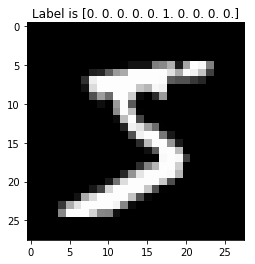

F:\Anaconda3\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


3
5


In [26]:
showData(x_train[0], y_train[0])
predict(x_train[0], y_train[0])